<a href="https://colab.research.google.com/github/happycindy7201/-/blob/main/%EC%A0%95%EC%A0%9C_%EC%9D%B4%EC%83%81%EC%B9%98_Case2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습목표
- 인공지능 모델 학습용 데이터 획득 후 데이터에서 이상치를 찾을 수 있다.
- 이상치를 다양한 방법으로 정제할 수 있다.
  - 삭제(deletion)
  - 대체(imputation)

# 데이터 준비

In [ ]:
# 필요 패키지 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# 랜덤 데이터 생성 (정상값 + 이상치 포함)
np.random.seed(20000101)
data = np.random.normal(50, 10, 100).tolist()  # 평균 50, 표준편차 10인 100개 데이터 생성
data.extend([120, 130, 140])  # 이상치 추가

In [ ]:
# 생성 데이터 출력
data[:5], len(data)

([46.93024793369561,
  49.80766768846534,
  47.25581140885367,
  62.41281946822036,
  55.52159525019444],
 103)

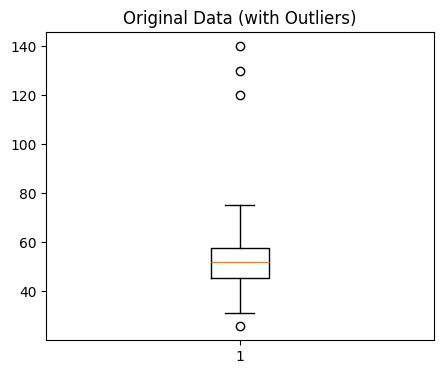

In [ ]:
# 데이터 시각화
plt.figure(figsize=(5, 4))

plt.boxplot(data)
plt.title('Original Data (with Outliers)')
plt.show()

# 이상치 확인 : IQR(Interquartile Range)
  - 최저 : Q1 - 1.5 * IQR
  - 최고 : Q3 + 1.5 * IQR

  ※ IRQ = Q3 - Q1

  ※ Q1 = 25%
  
  ※ Q3 = 75%

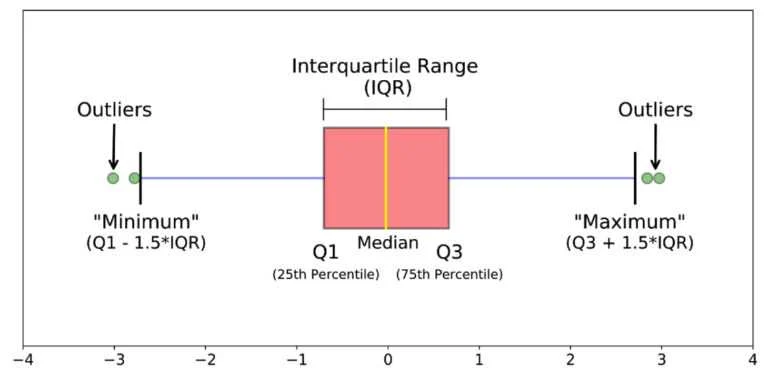

In [ ]:
# 작업하기 좋게 자료형으로 변환 (데이터프레임)
df = pd.DataFrame(data, columns=['value'])
df.head()

,value
0,46.930248
1,49.807668
2,47.255811
3,62.412819
4,55.521595


In [ ]:
# 이상치 범위 정의
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 범위
lower_bound, upper_bound

(np.float64(27.038185794458734), np.float64(76.24071392683965))

# 이상치 정제(제거, Deletion)

In [ ]:
# 이상치를 제거한다. (= 이상치 범위이외의 값을 선택한다.)
df_iqr_clean = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
df_iqr_clean

,value
0,46.930248
1,49.807668
2,47.255811
3,62.412819
4,55.521595
...,...
95,42.968552
96,46.523267
97,56.753028
98,62.916949


# 이상치 확인 : z-score(표준점수)

In [ ]:
# 이상치 : |z-score|가 3 이상인 데이터
z_scores = np.abs(stats.zscore(df['value']))
z_scores

array([0.39588543, 0.21999275, 0.37598418, 0.55054266, 0.1292917 ,
       0.1492505 , 0.56249837, 0.37827463, 0.83153787, 1.1251901 ,
       0.04288993, 0.04491268, 0.35831104, 0.13737318, 0.16237979,
       0.02813434, 0.37064544, 1.04034677, 1.34614013, 1.22377814,
       0.6685716 , 0.18611611, 0.59633196, 0.5309477 , 0.93017235,
       0.28476194, 0.51909101, 0.33036683, 0.86161832, 1.11359869,
       0.2141534 , 1.28719934, 0.03413009, 0.11382188, 0.55889839,
       0.19493897, 0.20608773, 0.44886644, 0.1757933 , 0.20271432,
       0.39151746, 0.73118977, 1.36749805, 0.79072044, 0.52391883,
       0.92649648, 0.23404907, 0.27371307, 0.30386271, 0.06082334,
       0.32162568, 0.6153837 , 1.04210009, 0.27733848, 0.75312246,
       0.07736305, 0.02044855, 0.63679986, 0.51720068, 0.3982018 ,
       0.60403016, 1.16864697, 0.02813005, 0.34085877, 0.2518119 ,
       0.18789506, 0.1569864 , 0.10864588, 0.18262691, 0.39589375,
       0.62497265, 0.15782451, 0.35999518, 0.16292035, 0.25854

# 이상치 정제(제거: Deletion)

In [ ]:
# 이상치를 제거한다. (= 이상치 범위이외의 값을 선택한다.)
df_zscore_clean = df[z_scores < 3]
df_zscore_clean

,value
0,46.930248
1,49.807668
2,47.255811
3,62.412819
4,55.521595
...,...
95,42.968552
96,46.523267
97,56.753028
98,62.916949


# 이상치 전/후 시각화

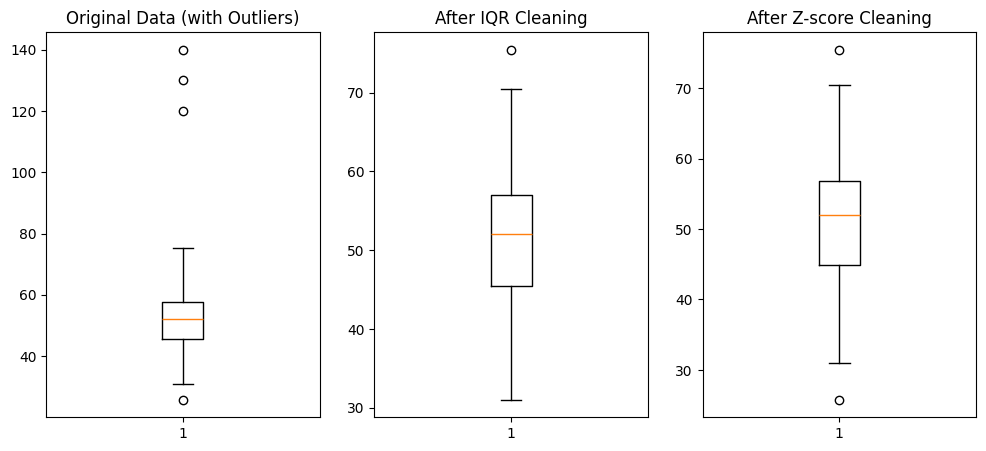

In [ ]:
# 이상치 정제 전후 비교 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['value'])
plt.title('Original Data (with Outliers)')

plt.subplot(1, 3, 2)
plt.boxplot(df_iqr_clean['value'])
plt.title('After IQR Cleaning')

plt.subplot(1, 3, 3)
plt.boxplot(df_zscore_clean['value'])
plt.title('After Z-score Cleaning')

plt.show()


# <font color='yellow'>※ 이상치 정제 후 시각화 결과에 주의할 것 !!!</font>

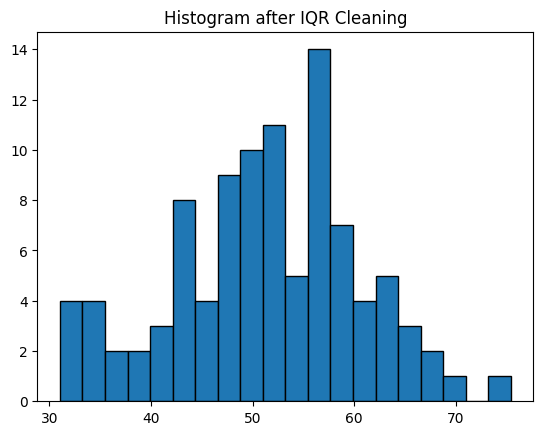

In [ ]:
# 히스토그램을 시각화
df_iqr_clean
plt.hist(df_iqr_clean["value"], bins=20, edgecolor="black")
plt.title("Histogram after IQR Cleaning")
plt.show()

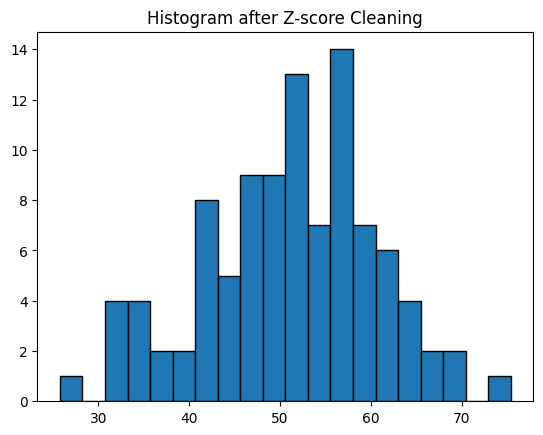

In [ ]:
# 히스토그램을 시각화
plt.hist(df_zscore_clean["value"], bins=20, edgecolor="black")
plt.title("Histogram after Z-score Cleaning")
plt.show()

# 이상치 확인 : IRQ(Interquartile Range)

In [ ]:
# 이상치 범위 정의
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 범위
lower_bound, upper_bound

(np.float64(27.038185794458734), np.float64(76.24071392683965))

# 이상치 정제(대체, Imputation)

In [ ]:
# 중앙값으로 이상치 대체
# 이상치 대체에 대한 이론 지식 + 자료형에 대한 지식 + 패키지 사용법 지식
median_value = df['value'].median()  # 중앙값 계산
df_iqr_imputaion = np.where((df['value'] < lower_bound) | (df['value'] > upper_bound), median_value, df['value'])

In [ ]:
df_iqr_imputaion, len(df_iqr_imputaion)

(array([46.93024793, 49.80766769, 47.25581141, 62.41281947, 55.52159525,
        55.84810041, 62.60840235, 59.59469503, 67.00960657, 34.99958781,
        54.10815295, 54.14124295, 59.26811163, 55.65379983, 50.75015545,
        52.94627031, 47.3431477 , 36.38753586, 75.4279603 , 33.38679079,
        42.46938786, 56.45118299, 43.65115276, 62.09226643, 38.18987387,
        48.74811177, 44.91473366, 48.00206351, 39.31134596, 35.1892112 ,
        49.90319348, 32.34928655, 53.9648511 , 51.54451189, 44.26352666,
        50.21752135, 50.03513931, 46.06353403, 50.53072438, 56.72271245,
        59.81133388, 65.3680168 , 31.03568369, 66.34187626, 44.83575565,
        68.56302997, 57.23531601, 48.92885964, 48.43564318, 54.40152462,
        58.66797761, 63.47355097, 70.45418377, 57.94348543, 41.08622441,
        52.14094021, 53.07200169, 42.98914029, 61.86737961, 46.89235444,
        63.28781892, 34.28867895, 52.94634051, 58.98261088, 49.2871399 ,
        56.48028483, 55.97465152, 51.62918578, 56.3

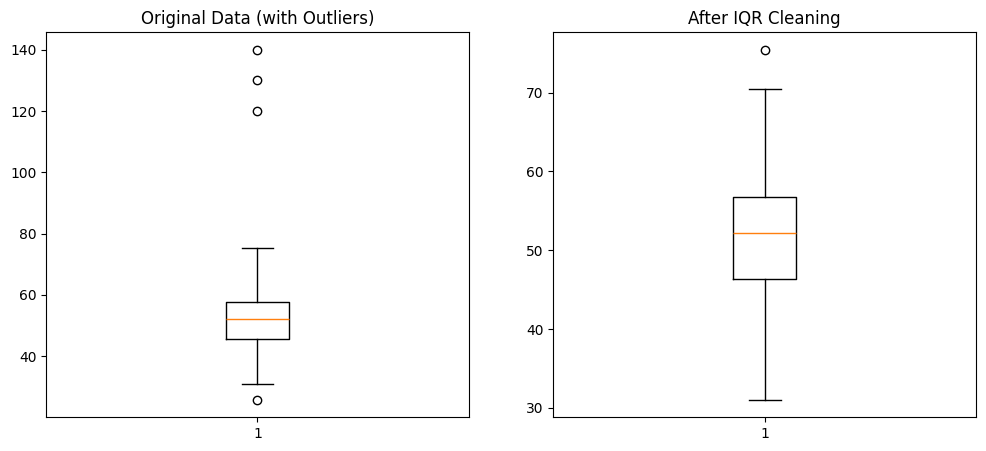

In [ ]:
# 이상치 정제 전후 비교 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['value'])
plt.title('Original Data (with Outliers)')

plt.subplot(1, 2, 2)
plt.boxplot(df_iqr_imputaion)
plt.title('After IQR Cleaning')

plt.show()




*   주어진 코드에서 IQR 방법을 적용한 후에도 이상치가 하나 생성된 것은, 데이터 분포가 변경되면서 기존에는 정상 범위에 속했던 값이 새로운 기준에서는 이상치로 판별되었기 때문으로 추정됩니다.





*   생성형 AI의 도움을 받아 이상치를 제거하고 난 후에 변형된 데이터로부터 생성된 이상치를 제거하는 코드를 작성해서 적용한 후 결과입니다.




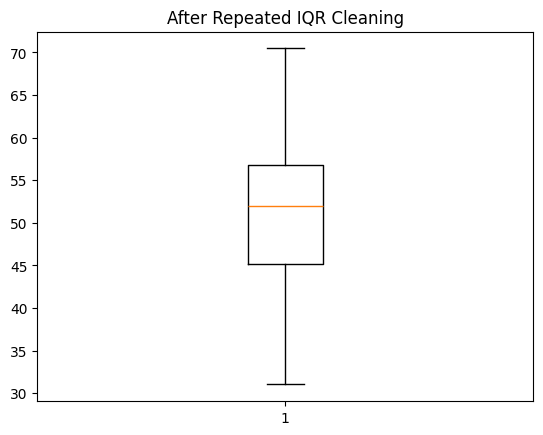

In [ ]:
# IQR 방법을 사용하여 이상치 제거 (반복)
while True:
  Q1 = df_iqr_clean['value'].quantile(0.25)
  Q3 = df_iqr_clean['value'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # 이상치 범위에 해당하는 데이터 추출
  outliers = df_iqr_clean[(df_iqr_clean['value'] < lower_bound) | (df_iqr_clean['value'] > upper_bound)]

  # 이상치가 없으면 반복 종료
  if outliers.empty:
    break

  # 이상치 제거
  df_iqr_clean = df_iqr_clean[(df_iqr_clean['value'] >= lower_bound) & (df_iqr_clean['value'] <= upper_bound)]

# 결과 확인
plt.boxplot(df_iqr_clean['value'])
plt.title('After Repeated IQR Cleaning')
plt.show()